<a href="https://colab.research.google.com/github/furkanonat/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module3-join-and-reshape-data/Furkan_Onat_LS_DS_113_Join_and_Reshape_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-04-09 08:00:42--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.32.78
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.32.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.4’

instacart_online_gr 100%[===================>] 196.03M  47.2MB/s    in 4.6s    

2020-04-09 08:00:47 (42.7 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.4’ saved [205548478/205548478]



In [0]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [0]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [0]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

====================================================

We need following columns from related datasets:
  The Products DataFrame
  * product_id
  * product_name
  

  The order_products__prior DataFrame
  * order_id
  * product_id

  The order_products__train DataFrame
  * order_id
  *product_id



In [1]:
##### YOUR CODE HERE #####

import pandas as pd

# 1. Banana
#2. Bag of Organic Bananas
#3. Organic Strawberries
#4. Organic Baby Spinach 
#5. Organic Hass Avocado
#6. Organic Avocado
#7. Large Lemon 
#8. Strawberries
#9. Limes 
#10. Organic Whole Milk

products_popular = products[(products['product_name'] == 'Banana') | (products['product_name'] == 'Bag of Organic Bananas') | (products['product_name'] == 'Organic Strawberries') | 
                            (products['product_name'] == 'Organic Baby Spinach') | (products['product_name'] == 'Organic Hass Avocado') | (products['product_name'] == 'Organic Avocado') | 
                            (products['product_name'] == 'Large Lemon') | (products['product_name'] == 'Strawberries') | (products['product_name'] == 'Limes') | 
                            (products['product_name'] == 'Organic Whole Milk')]

print(products_popular.shape)
products_popular.head(10)

NameError: ignored

In [0]:
products_popular = products_popular[['product_id', 'product_name']]

products_popular

,product_id,product_name
13175,13176,Bag of Organic Bananas
16796,16797,Strawberries
21136,21137,Organic Strawberries
21902,21903,Organic Baby Spinach
24851,24852,Banana
26208,26209,Limes
27844,27845,Organic Whole Milk
47208,47209,Organic Hass Avocado
47625,47626,Large Lemon
47765,47766,Organic Avocado


In [0]:
order_popular = pd.concat([order_products__prior[['order_id', 'product_id']], order_products__train[['order_id', 'product_id']]], axis=1)

print(order_popular.shape)
order_popular.head()

(32434489, 4)


,order_id,product_id,order_id,product_id
0,2,33120,1.0,49302.0
1,2,28985,1.0,11109.0
2,2,9327,1.0,10246.0
3,2,45918,1.0,49683.0
4,2,30035,1.0,43633.0


In [0]:
condition = order_popular['product_id'].isin(products_popular['product_id'])

populars = order_popular[condition]

print(populars.shape)
populars.head()

ValueError: ignored

## Reshape Data Section

- Replicate the lesson code. Remember, if you haven't followed along typing out what we did during lecture, do that now to get more repetition with the syntax.
- Take table 2 (the transpose of table 1) and practice changing it into Tidy format and back again. You should not use the transpose operation anywhere in this code:
 - Table 2 --> Tidy
 - Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

# Replicate the Lesson Code

In [0]:
import pandas as pd

In [0]:
df1 = pd.DataFrame({'a': [1,2,3,4], 'b': [4,5,6,7], 'c': [7,8,9,10]})

df2 = pd.DataFrame({'a': [6,4,8,7], 'b': [9,4,3,2],'c': [1,6,2,9]})

In [0]:
df1.head()

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9
3,4,7,10


In [0]:
df2.head()

,a,b,c
0,6,9,1
1,4,4,6
2,8,3,2
3,7,2,9


In [0]:
# Concatenate by Rows

by_rows = pd.concat([df1, df2])
by_rows

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9
3,4,7,10
0,6,9,1
1,4,4,6
2,8,3,2
3,7,2,9


In [0]:
by_cols = pd.concat([df1, df2], axis=1)

by_cols

,a,b,c,a,b,c
0,1,4,7,6,9,1
1,2,5,8,4,4,6
2,3,6,9,8,3,2
3,4,7,10,7,2,9


In [0]:
df3 = pd.DataFrame({'a': [4,3,2,1], 'b': [4,5,6,7], 'c': [7,8,9,10]})

df4 = pd.DataFrame({'a': [6,4,8,7,8], 'b': [9,4,3,2,1], 'd': [1,6,2,9,5]})

In [0]:
df3.head()

,a,b,c
0,4,4,7
1,3,5,8
2,2,6,9
3,1,7,10


In [0]:
df4.head()

,a,b,d
0,6,9,1
1,4,4,6
2,8,3,2
3,7,2,9
4,8,1,5


In [0]:
# Concatenate by columns when not all rows match

by_columns = pd.concat([df3, df4], axis=1)
by_columns

,a,b,c,a,b,d
0,4.0,4.0,7.0,6,9,1
1,3.0,5.0,8.0,4,4,6
2,2.0,6.0,9.0,8,3,2
3,1.0,7.0,10.0,7,2,9
4,NaN,NaN,NaN,8,1,5


In [0]:
# Concatenate by rows when not all column headers match

by_rows = pd.concat([df3, df4])
by_rows

,a,b,c,d
0,4,4,7.0,NaN
1,3,5,8.0,NaN
2,2,6,9.0,NaN
3,1,7,10.0,NaN
0,6,9,NaN,1.0
1,4,4,NaN,6.0
2,8,3,NaN,2.0
3,7,2,NaN,9.0
4,8,1,NaN,5.0


In [0]:
by_columns['a']

,a,a
0,4.0,6
1,3.0,4
2,2.0,8
3,1.0,7
4,NaN,8


In [0]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*vYGFQCafJtGBBX5mbl0xyw.png'
example = Image(url=url, width=600)

display(example)

In [0]:
# Aisles

aisles = pd.read_csv('aisles.csv')
print(aisles.shape)
aisles.head()


(134, 2)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [0]:
# Departments

departments = pd.read_csv('departments.csv')
print(departments.shape)
departments.head()

(21, 2)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [0]:
# order_products__prior

order_products__prior = pd.read_csv('order_products__prior.csv')
print(order_products__prior.shape)
order_products__prior.head()

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [0]:
# order_products__train

order_products__train = pd.read_csv('order_products__train.csv')
print(order_products__train.shape)
order_products__train.head()

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [0]:
# orders

orders = pd.read_csv('orders.csv')
print(orders.shape)
orders.head()

(3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [0]:
# Products

products = pd.read_csv('products.csv')
print(products.shape)
products.head()

(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [0]:
display(example)

# Concatenate order_products_prior and order_products_train

In [0]:
# Create order_products 

order_products = pd.concat([order_products__prior[['order_id', 'product_id', 'add_to_cart_order']], order_products__train[['order_id', 'product_id', 'add_to_cart_order']]])

print(order_products.shape)
order_products.head()

(33819106, 3)


,order_id,product_id,add_to_cart_order
0,2,33120,1
1,2,28985,2
2,2,9327,3
3,2,45918,4
4,2,30035,5


In [0]:
order_products__train.shape

(1384617, 4)

In [0]:
order_products__prior.shape

(32434489, 4)

In [0]:
order_products.shape

(33819106, 3)

# Merge DataFrames with Pandas

  The Orders Dataframe 

  * user_id
  * order_id
  * order_number
  * order_dow
  * order_hour_of_day
  

  The Products Dataframe

  * product_id
  * product_name
  

  The Order_Products Dataframe

  * order_id
  * product_id
  * add_to_cart_order



# Merge

In [0]:
loan_status = 'Not Current'

if loan_status =='Current' or loan_status =='Fully Paid':
  print('Its Current')

In [0]:
loan_status == 'Current'

False

In [0]:
# An example of Dataframing

# Create a condition
orders['order_id'] <= 5

# Put this condition into square brackets, only the rows which this conditions evaluates to True will be retained in the dataframe

orders[orders['order_id'] <= 5]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1868044,1,112108,train,4,4,10,9.0
2593373,5,156122,prior,42,6,16,9.0
2958007,4,178520,prior,36,1,9,7.0
3355525,2,202279,prior,3,5,9,8.0
3417191,3,205970,prior,16,5,17,12.0


In [0]:
condition1 = orders['user_id'] == 1
condition2 = orders['order_number'] <= 2

orders_subset = orders[(condition1 & condition2)]

orders_subset

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0


In [0]:
orders_subset = orders[(orders['user_id'] ==1) & (orders['order_number'] <= 2)]

orders_subset

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0


In [0]:
order_products_subset = order_products[(order_products['order_id'] == 2539329) | (order_products['order_id'] == 2398795)]

order_products_subset

,order_id,product_id,add_to_cart_order
22742744,2398795,196,1
22742745,2398795,10258,2
22742746,2398795,12427,3
22742747,2398795,13176,4
22742748,2398795,26088,5
22742749,2398795,13032,6
24076664,2539329,196,1
24076665,2539329,14084,2
24076666,2539329,12427,3
24076667,2539329,26088,4


In [0]:
orders_and_products = pd.merge(orders_subset, order_products_subset, how='inner', on='order_id')

orders_and_products

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order
0,2539329,1,prior,1,2,8,NaN,196,1
1,2539329,1,prior,1,2,8,NaN,14084,2
2,2539329,1,prior,1,2,8,NaN,12427,3
3,2539329,1,prior,1,2,8,NaN,26088,4
4,2539329,1,prior,1,2,8,NaN,26405,5
5,2398795,1,prior,2,3,7,15.0,196,1
6,2398795,1,prior,2,3,7,15.0,10258,2
7,2398795,1,prior,2,3,7,15.0,12427,3
8,2398795,1,prior,2,3,7,15.0,13176,4
9,2398795,1,prior,2,3,7,15.0,26088,5


In [0]:
display(example)

In [0]:
orders_and_products = orders_and_products[['user_id', 'order_id', 'order_number', 'order_dow', 'order_hour_of_day', 'add_to_cart_order', 'product_id']]

orders_and_products

,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id
0,1,2539329,1,2,8,1,196
1,1,2539329,1,2,8,2,14084
2,1,2539329,1,2,8,3,12427
3,1,2539329,1,2,8,4,26088
4,1,2539329,1,2,8,5,26405
5,1,2398795,2,3,7,1,196
6,1,2398795,2,3,7,2,10258
7,1,2398795,2,3,7,3,12427
8,1,2398795,2,3,7,4,13176
9,1,2398795,2,3,7,5,26088


In [0]:
# Merge with products

condition = products['product_id'].isin(orders_and_products['product_id'])

products_subset = products[condition]

products_subset

,product_id,product_name,aisle_id,department_id
195,196,Soda,77,7
10257,10258,Pistachios,117,19
12426,12427,Original Beef Jerky,23,19
13031,13032,Cinnamon Toast Crunch,121,14
13175,13176,Bag of Organic Bananas,24,4
14083,14084,Organic Unsweetened Vanilla Almond Milk,91,16
26087,26088,Aged White Cheddar Popcorn,23,19
26404,26405,XL Pick-A-Size Paper Towel Rolls,54,17


In [0]:
# final Merge 

final = pd.merge(orders_and_products, products_subset[['product_id', 'product_name']], how='inner', on= 'product_id')

final

,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id,product_name
0,1,2539329,1,2,8,1,196,Soda
1,1,2398795,2,3,7,1,196,Soda
2,1,2539329,1,2,8,2,14084,Organic Unsweetened Vanilla Almond Milk
3,1,2539329,1,2,8,3,12427,Original Beef Jerky
4,1,2398795,2,3,7,3,12427,Original Beef Jerky
5,1,2539329,1,2,8,4,26088,Aged White Cheddar Popcorn
6,1,2398795,2,3,7,5,26088,Aged White Cheddar Popcorn
7,1,2539329,1,2,8,5,26405,XL Pick-A-Size Paper Towel Rolls
8,1,2398795,2,3,7,2,10258,Pistachios
9,1,2398795,2,3,7,4,13176,Bag of Organic Bananas


In [0]:
# Some other Cleanup

# Sort Rows

final = final.sort_values(by=['order_number', 'add_to_cart_order'])

final

,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id,product_name
0,1,2539329,1,2,8,1,196,Soda
2,1,2539329,1,2,8,2,14084,Organic Unsweetened Vanilla Almond Milk
3,1,2539329,1,2,8,3,12427,Original Beef Jerky
5,1,2539329,1,2,8,4,26088,Aged White Cheddar Popcorn
7,1,2539329,1,2,8,5,26405,XL Pick-A-Size Paper Towel Rolls
1,1,2398795,2,3,7,1,196,Soda
8,1,2398795,2,3,7,2,10258,Pistachios
4,1,2398795,2,3,7,3,12427,Original Beef Jerky
9,1,2398795,2,3,7,4,13176,Bag of Organic Bananas
6,1,2398795,2,3,7,5,26088,Aged White Cheddar Popcorn


In [0]:
# Remove underscores from headers

final.columns = [column.replace('_', ' ') for column in final]

final

,user id,order id,order number,order dow,order hour of day,add to cart order,product id,product name
0,1,2539329,1,2,8,1,196,Soda
2,1,2539329,1,2,8,2,14084,Organic Unsweetened Vanilla Almond Milk
3,1,2539329,1,2,8,3,12427,Original Beef Jerky
5,1,2539329,1,2,8,4,26088,Aged White Cheddar Popcorn
7,1,2539329,1,2,8,5,26405,XL Pick-A-Size Paper Towel Rolls
1,1,2398795,2,3,7,1,196,Soda
8,1,2398795,2,3,7,2,10258,Pistachios
4,1,2398795,2,3,7,3,12427,Original Beef Jerky
9,1,2398795,2,3,7,4,13176,Bag of Organic Bananas
6,1,2398795,2,3,7,5,26088,Aged White Cheddar Popcorn


In [0]:
display(example)

# Learn Tidy Data format

In [0]:
%matplotlib inline 
import pandas as pd
import numpy as np
import seaborn as sns

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16, 11],
     [3, 11]],
     index=['John Smith', 'Jane Doe', 'Mary Johnson'],
     columns=['treatmenta', 'treatmentb']
)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,11


In [0]:
table2 = table1.T
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,11.0


## Use MELT function o reshape the Table 1 into Tidy Format

In [0]:
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,11


In [0]:
table1 = table1.reset_index()
table1

,index,treatmenta,treatmentb
0,John Smith,NaN,2
1,Jane Doe,16.0,11
2,Mary Johnson,3.0,11


In [0]:
# MELT function

tidy1 = table1.melt(id_vars='index', value_vars=['treatmenta', 'treatmentb'])

tidy1

,index,variable,value
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,11.0


In [0]:
# RENAME columns 

tidy1 = tidy1.rename(columns={
    'index':'name',
    'variable':'trt',
    'value':'result'
})
tidy1

,name,trt,result
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,11.0


In [0]:
# Changing the Values
tidy1.trt = tidy1.trt.str.replace('treatment', '')

tidy1

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,11.0


# PIVOT_TABLE function is the inverse of MELT.

In [0]:
wide = tidy1.pivot_table(index='name', columns='trt', values='result')

wide

trt,a,b
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,11.0


# Transition between tidy and wide data formats with .melt() and .pivot()

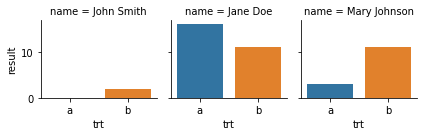

In [0]:
import seaborn as sns

sns.catplot(x='trt', y='result', col='name', kind='bar', data=tidy1, height=2);

In [0]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*wKfV6OV-_1Ipwrl7AjjSuw.png'
example = Image(url=url, width=600)

display(example)

In [0]:
# Half and Half Ultra PAsteurized
# Half Bake Frozen Yogurt

# 3 Datasets to work with 

products = pd.read_csv('products.csv')

order_products = pd.concat([pd.read_csv('order_products__prior.csv'), 
                            pd.read_csv('order_products__train.csv')])

orders = pd.read_csv('orders.csv')

In [0]:
product_names = ['Half Baked Frozen Yogurt', 'Half and Half Ultra Pasteurized']

In [0]:
# What columns to work with

print(products.columns.to_list())

print(orders.columns.to_list())

print(order_products.columns.to_list())

['product_id', 'product_name', 'aisle_id', 'department_id']
['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']
['order_id', 'product_id', 'add_to_cart_order', 'reordered']


In [0]:
# Merge them in one go

merged = (products[['product_id', 'product_name']].merge(order_products[['order_id', 'product_id']]).merge(orders[['order_id', 'order_hour_of_day']]))
print(merged.shape)
merged.head()

(33819106, 4)


,product_id,product_name,order_id,order_hour_of_day
0,1,Chocolate Sandwich Cookies,1107,11
1,769,Sliced American Cheese,1107,11
2,6184,Clementines,1107,11
3,8048,Packaged Grape Tomatoes,1107,11
4,9007,Frosted Flakes,1107,11


In [0]:
# Subset the dataframes

condition = ((merged['product_name'] == 'Half Baked Frozen Yogurt') | (merged['product_name'] == 'Half and Half Ultra Pasteurized'))

merged = merged[condition]

print(merged.shape)
merged.head()

(2983, 4)


,product_id,product_name,order_id,order_hour_of_day
25086,30668,Half Baked Frozen Yogurt,595220,21
29409,30668,Half Baked Frozen Yogurt,3252348,16
33914,30668,Half Baked Frozen Yogurt,677455,17
34412,30668,Half Baked Frozen Yogurt,1821824,14
35652,30668,Half Baked Frozen Yogurt,1225489,17


In [0]:
# Another way of writing condition and subsetting

product_names = ['Half Baked Frozen Yogurt', 'Half and Half Ultra Pasteurized']

condition = merged['product_name'].isin(product_names)

subset = merged[condition]

print(subset.shape)
subset.head()

(2983, 4)


,product_id,product_name,order_id,order_hour_of_day
25086,30668,Half Baked Frozen Yogurt,595220,21
29409,30668,Half Baked Frozen Yogurt,3252348,16
33914,30668,Half Baked Frozen Yogurt,677455,17
34412,30668,Half Baked Frozen Yogurt,1821824,14
35652,30668,Half Baked Frozen Yogurt,1225489,17


# 4 ways to reshape and plot

In [0]:
display(example)

In [0]:
# The value_counts Approach

froyo = subset[subset['product_name'] == 'Half Baked Frozen Yogurt']
cream = subset[subset['product_name'] == 'Half and Half Ultra Pasteurized']

In [0]:
cream['order_hour_of_day'].value_counts(normalize=True).sort_index()

Series([], Name: order_hour_of_day, dtype: float64)

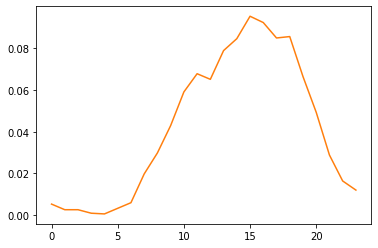

In [0]:
(cream['order_hour_of_day']
 .value_counts(normalize=True)
 .sort_index()
 .plot())

(froyo['order_hour_of_day']
.value_counts(normalize=True)
.sort_index()
.plot());

# Crosstab

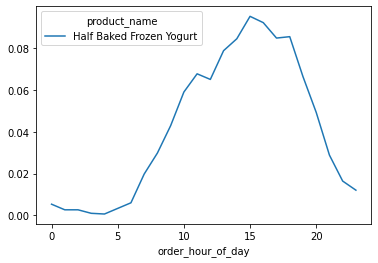

In [0]:
pd.crosstab(subset['order_hour_of_day'],
            subset['product_name'],
            normalize='columns').plot();

#Pivot Table

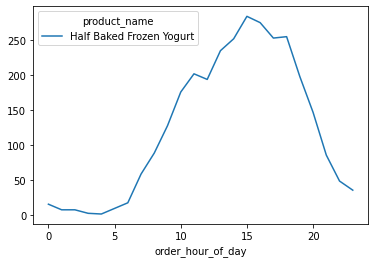

In [0]:
subset.pivot_table(index='order_hour_of_day', columns='product_name', values='order_id', aggfunc=len).plot();

# 4) Melt 

In [0]:
wide = pd.crosstab(subset['order_hour_of_day'],
                   subset['product_name'],
                   normalize=True)

wide

product_name,Half Baked Frozen Yogurt
order_hour_of_day,
0,0.005364
1,0.002682
2,0.002682
3,0.001006
4,0.000670
5,0.003352
6,0.006034
7,0.019779
8,0.029836


In [0]:
melted = wide.reset_index().melt(id_vars='order_hour_of_day')

# rename column headers

melted = melted.rename(columns={'order_hour_of_day': 'Hour of Day Ordered','product_name': 'Product','value': 'Percent of Orders by Product'})

melted

,Hour of Day Ordered,Product,Percent of Orders by Product
0,0,Half Baked Frozen Yogurt,0.005364
1,1,Half Baked Frozen Yogurt,0.002682
2,2,Half Baked Frozen Yogurt,0.002682
3,3,Half Baked Frozen Yogurt,0.001006
4,4,Half Baked Frozen Yogurt,0.000670
5,5,Half Baked Frozen Yogurt,0.003352
6,6,Half Baked Frozen Yogurt,0.006034
7,7,Half Baked Frozen Yogurt,0.019779
8,8,Half Baked Frozen Yogurt,0.029836
9,9,Half Baked Frozen Yogurt,0.042910


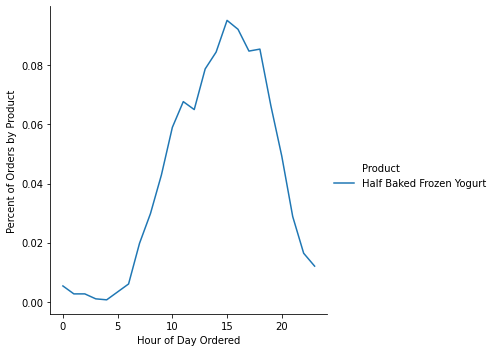

In [0]:
sns.relplot(x='Hour of Day Ordered', y='Percent of Orders by Product', hue='Product', data=melted, kind='line');

# Seaborn's flights Dataset

In [0]:
import pandas as pd
import numpy as np

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [0]:
# table2 -> tidy

table2 = table2.reset_index()
table2

,index,John Smith,Jane Doe,Mary Johnson
0,treatmenta,NaN,16.0,3.0
1,treatmentb,2.0,11.0,1.0


In [0]:
tidy = table2.melt(id_vars=['John Smith', 'Jane Doe', 'Mary Johnson'], value_vars='index')

tidy

,John Smith,Jane Doe,Mary Johnson,variable,value
0,NaN,16.0,3.0,index,treatmenta
1,2.0,11.0,1.0,index,treatmentb


In [0]:
# tidy -> table2

In [2]:
import seaborn as sns
flights = sns.load_dataset('flights')

print(flights.shape)
flights.head(10)

(144, 3)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
5,1949,June,135
6,1949,July,148
7,1949,August,148
8,1949,September,136
9,1949,October,119


In [3]:
# Flights Pivot Table
flights.pivot_table(index='year', columns='month', values='passengers')

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [0]:
##### YOUR CODE HERE #####

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
##### YOUR CODE HERE #####